In [1]:
from pymopt.voxel import VoxelPlateMonteCarlo
#from pymopt.voxel import PlateModel
from pymopt.voxel import VoxelPlateModel
from scipy import stats
import numpy as np
import pandas as pa

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks", {'grid.linestyle': '--'})
import warnings
warnings.filterwarnings('ignore')
import time

In [2]:
nPh = 500000
params = {
    'thickness':[0.02],
    'ms':[90],
    'ma':[10],
    'g':[0.75],
    'n':[1.],
    'n_air':1.,
    'xy_size':4,
    'voxel_space':0.001,
}
model = VoxelPlateModel(nPh = nPh)
model.built(**params)

Memory area size for voxel storage: 352 Mbyte


In [3]:
monte = VoxelPlateMonteCarlo(nPh,0)

In [4]:
a = model.add.astype(int)
monte.setInitialCoordinate(model.p,
                           model.v,
                           a,
                           model.w)

In [5]:
monte.setModel(model.getVoxelModel(),
               params['voxel_space'])

In [6]:
para = model.getParams()
monte.setParams(para['ma'],para['ms'],para['g'],para['n'])
monte.getParams()

{'ma': array([10.], dtype=float32),
 'ms': array([90.], dtype=float32),
 'g': array([0.75], dtype=float32),
 'n': array([1., 1.], dtype=float32)}

In [7]:
start = time.time()
monte.start()
print('%s sec'%(time.time()-start))


###### Start ######


###### Finish ######
45.5175838470459 sec


In [8]:
logger = monte.get_logger()
print(logger['logger_float'].sum())
logger

0.0


{'logger1': 0,
 'logger2': 0,
 'logger_int': array([0, 0, 0, ..., 0, 0, 0]),
 'logger_float': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)}

In [9]:
aa = logger['logger_float']
aa = aa[aa>0]
b = []
for i in aa[::10]:
    b.append(i)
    

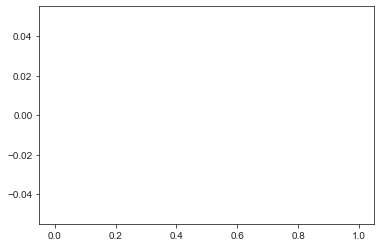

In [10]:
plt.hist(b,bins = 30)
plt.show()

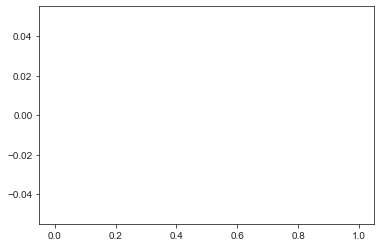

In [11]:
plt.hist(np.random.rand(len(b)),bins=30)
plt.show()

In [12]:
from math import copysign ,sqrt,log,fabs,sin,cos,acos,asin, tan
ai = 0.001
at = asin(sin(ai)*(1.5/1))
0.5*((sin(ai-at)/sin(ai+at))**2+(tan(ai-at)/tan(ai+at))**2)

0.0400000000000825

In [13]:
rez = monte.getResult()
w_result = rez['w']
p_result = rez['p']
v_result = rez['v']
v_result = v_result[:, ~np.isnan(v_result).all(axis=0)]
p_result = p_result[:, ~np.isnan(p_result).all(axis=0)]
w_result=w_result[~np.isnan(w_result)]

In [14]:

np.count_nonzero(np.isnan(w_result))

0

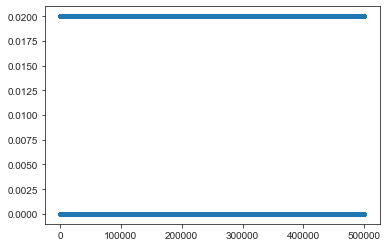

In [15]:
plt.plot(p_result[2],'.')
plt.show()


In [16]:

Tt_index = np.where(v_result[2]>0)[0]
Rd_index = np.where(v_result[2]<0)[0]

print('######')
print('Mean Rd %0.6f'%(w_result[Rd_index].sum()/nPh))
print('Mean Tt %0.6f'%(w_result[Tt_index].sum()/nPh))

######
Mean Rd 0.101136
Mean Tt 0.656622


In [18]:

def AngularyResolved(v,w,nn):
    da = np.pi/(2*nn)
    alpha = np.array([(i+0.5)*da for i in range(nn+1)])
    alpha2 = np.array([(i)*da for i in range(nn+1)])
    do = 4*np.pi*np.sin(alpha)*np.sin(da/2)
    at = np.arccos(np.sign(v[2])*(v[2]))
    Rda = []
    for i in range(nn):
        index = np.where((alpha2[i]<at)&(alpha2[i+1]>=at))[0]
        Rda.append(w[index].sum())
    Rda = np.array(Rda)/(do[:-1]*nPh)
    return alpha[:-1],Rda

Trancemittance


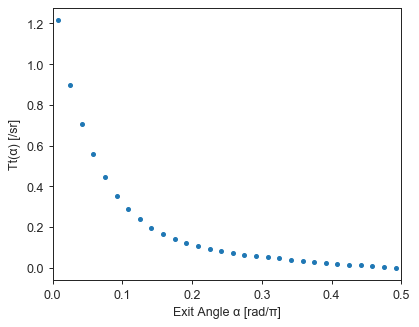

In [21]:
print('Trancemittance')
nn = 30
alpha,Tta = AngularyResolved(v_result[:,Tt_index],w_result[Tt_index],nn)

plt.figure(figsize=(5,4),dpi=90)
plt.plot(alpha/np.pi,Tta,'.')
plt.xlabel('Exit Angle α [rad/π]')
plt.ylabel('Tt(α) [/sr]')
plt.xlim(0,0.5)
#plt.ylim(0,0.8)
plt.show()

Refrected


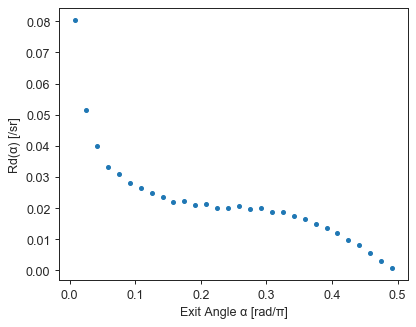

In [20]:
print('Refrected')
nn = 30
alpha,Rda = AngularyResolved(v_result[:,Rd_index],w_result[Rd_index],nn)

plt.figure(figsize=(5,4),dpi=90)
plt.plot(alpha/np.pi,Rda,'.')
plt.xlabel('Exit Angle α [rad/π]')
plt.ylabel('Rd(α) [/sr]')
#plt.xlim(0,0.5)
#plt.ylim(0,0.025)
plt.show()

In [25]:
nPh = 10000
monte.set_nofphoton(nPh)
monte.setInitialCoordinate(model.p,
                           model.v,
                           a,
                           model.w)

In [14]:
from math import copysign ,sqrt,log,fabs,sin,cos,acos,asin, tan
aaa = model.getVoxelModel()

In [16]:
print(tan(1))
print(np.tan(1))

1.557407724654902
1.557407724654902


In [12]:
sqrt(float(float(1.)-float(0.99999)**2))

0.004472124774634615

In [15]:
int(copysign(1,-1))

-1

In [11]:
model.getVoxelModel().shape

(402, 402, 42)

In [45]:
def _distance_to_boundary( x,  v,  l):
    db = 0
    if v == 0:
        db = 10000
    else:
        db = (l/2-x*copysign(1,v))/fabs(v)
    return db

def _get_index_val(index ,x, y, z):
    val = 0.
    if index == 0:
        val = x
    elif index == 1:
        val = y
    elif index == 2:
        val = z
    return val

def _create01val(index, index_val,base_val):
    x = base_val; y = base_val; z = base_val
    if index == 0:
        x = index_val
    elif index == 1:
        y = index_val
    elif index == 2:
        z = index_val
    return x,y,z

def _get_next_add(index,  x,  y,  z, 
                        vx,  vy,  vz):
    val = 0
    if index == 0:
        val = int(copysign(1,vx))
        x = x + val
    elif index == 1:
        val = int(copysign(1,vy))
        y = y + val
    elif index == 2:
        val = int(copysign(1,vz))
        z = z + val
    return x,y,z

    
def vectorUpdate(vx,vy,vz,G,f="float32"):
    cosTh = 0
    if G == 0:
        rand_ = np.random.rand()
        cosTh = 2*rand_-1
    else:
        cosTh = (1+G**2-((1-G**2)/(1-G+2*G*np.random.rand()))**2)/(2*G)
    sinTh = sqrt(1-cosTh**2)

    #cos(fai)とsin(fai)と求める
    Fi = 2*np.pi*np.random.rand()
    cosFi = np.cos(Fi)
    sinFi = np.sin(Fi)

    #Zが１かそれ以外で分離
    th = 0.99999

    #Z方向ベクトルが0.99999以下
    if vz <= th:
        B = sqrt(1-vz**2)
        A = np.array([
            sinTh*(vx*vz*cosFi-vy*sinFi)/B,
            sinTh*(vy*vz*cosFi+vx*sinFi)/B,
            -sinTh*cosFi*B,
        ])
        vx = A[0] + vx*cosTh
        vy = A[1] + vy*cosTh
        vz = A[2] + vz*cosTh
    else:
        vx = sinTh*cosFi
        vy = sinTh*sinFi
        vz = np.sign(vz)*cosTh
    vl = np.linalg.norm([vx,vy,vz],axis=0)
    vx = vx/vl
    vy = vy/vl
    vz = vz/vl
    return vx,vy,vz

def _p_movement(x,v,s):
    return x+v*s
    
def random_uniform():
    return np.random.rand()

def _a_photon_movement(p_id):
    px = 0; py = 0; pz = -0.005
    vx = 0; vy = 0; vz = 1
    adx = 201; ady = 201; adz = 1
    w = 1
    
    l = 0.01
    
    flag_1 = 1
    flag_2 = 1
    while flag_1:
        s = random_uniform()
        s = -log(s)
        flag_2 = 1
        while flag_2:
            ma = 1
            ms = 100
            mt = ma + ms
            s = s/mt
            dbx = _distance_to_boundary(px,vx,l)
            dby = _distance_to_boundary(py,vy,l)
            dbz = _distance_to_boundary(pz,vz,l)

            index = -1
            if dbz < dbx and dbz < dby:
                db_min = dbz
                index = 2
            elif dby < dbx and dby < dbz:
                db_min = dby
                index = 1
            elif dbx < dby and dbx < dbz:
                db_min = dbx
                index = 0
            val_f = db_min-s
            if val_f <= 0:
                s -= db_min
                
                px += vx*db_min
                py += vy*db_min
                pz += vz*db_min
                
                ni = 1
                #val_xi, val_yi, val_zi = self._get_next_add(index,adx,ady,adz,vx,vy,vz)
                
                val_xi = adx;val_yi = ady;val_zi = adz
                if index == 0:
                    val_i = int(copysign(1,vx))
                    val_xi = adx + val_i
                elif index == 1:
                    val_i = int(copysign(1,vy))
                    val_yi = ady + val_i
                elif index == 2:
                    val_i = int(copysign(1,vz))
                    val_zi = adz + val_i
                nt = ni#self._getReflectiveIndex(val_xi,val_yi,val_zi)

                if ni != nt:
                    print("A")
                    pass

                else:
                    adx = val_xi; ady = val_yi; adz = val_zi
                    val_xi,val_yi,val_zi = _create01val(index,-1,1)
                    print("c")
                    print(val_xi,val_yi,val_zi)
                    print(px,py,pz)
                    px *= val_xi
                    py *= val_yi
                    pz *= val_zi
                    print(px,py,pz)

                s *= mt
                val_i = aaa[adx][ady][adz]
                if val_i < 0:
                    print("AAAA")
                    flag_1 = 0

                    break

            else:
                px = px + vx*s
                py = py + vy*s
                pz = pz + vz*s

                g = 0.9
                vx,vy,vz = vectorUpdate( vx, vy, vz, g)
                w -= w*ma/mt
                if w <= 0.0001:
                    w = 0
                    if w == 0.:
                        print("BBBB")
                        flag_1 = 0
                        break
                flag_2 = 0

In [46]:
_a_photon_movement( 0)

c
1 1 -1
-0.0001109572068015864 -0.0001450059605674622 0.005
-0.0001109572068015864 -0.0001450059605674622 -0.005
c
1 1 -1
-0.00026611985628076704 -0.0006357774312735557 0.005
-0.00026611985628076704 -0.0006357774312735557 -0.005
c
1 1 -1
-0.0007953091551939162 0.0018737761765568821 0.005
-0.0007953091551939162 0.0018737761765568821 -0.005
c
1 1 -1
-0.0013244984541070652 0.00438332978438732 0.005
-0.0013244984541070652 0.00438332978438732 -0.005
c
1 -1 1
-0.0014545356360355353 0.005 -0.0025427095333269063
-0.0014545356360355353 -0.005 -0.0025427095333269063
c
1 1 -1
0.0003400848753096577 -0.0036684319530806662 0.005
0.0003400848753096577 -0.0036684319530806662 -0.005
c
1 -1 1
0.0038822228669945762 -0.005 -0.000720920758952743
0.0038822228669945762 0.005 -0.000720920758952743
c
-1 1 1
0.005 0.004555045466638754 0.00024331325301302545
-0.005 0.004555045466638754 0.00024331325301302545
c
1 1 -1
0.00026348453243123433 0.002305422721302309 0.005
0.00026348453243123433 0.002305422721302309 -

In [88]:
_distance_to_boundary( -0.001,  1,  0.002)
(0.002/2-(-0.001)*copysign(1,1))/fabs(1)

0.002

In [ ]:
nPh = 100
p = np.zeros((3,nPh)).astype('float32')
v = np.zeros((3,nPh)).astype('float32')


In [2]:
def radialDistance(p,w,nn,dr):
    alpha = np.array([(i)*dr for i in range(nn+1)])
    da = np.array([2*np.pi*(i+0.5)*dr**2 for i in range(nn)])
    r = np.sqrt(p[0]**2+p[1]**2)
    Rdr = []
    for i in range(nn):
        index = np.where((alpha[i]<r)&(alpha[i+1]>=r))[0]
        Rdr.append(w[index].sum())
    Rdr = np.array(Rdr)/(da*nPh)
    return alpha[:-1],Rdr

def AngularyResolved(v,w,nn):
    da = np.pi/(2*nn)
    alpha = np.array([(i+0.5)*da for i in range(nn+1)])
    alpha2 = np.array([(i)*da for i in range(nn+1)])
    do = 4*np.pi*np.sin(alpha)*np.sin(da/2)
    at = np.arccos(np.sign(v[2])*(v[2]))
    Rda = []
    for i in range(nn):
        index = np.where((alpha2[i]<at)&(alpha2[i+1]>=at))[0]
        Rda.append(w[index].sum())
    Rda = np.array(Rda)/(do[:-1]*nPh)
    return alpha[:-1],Rda

In [6]:
nPh = 500000
model = VoxcelPlateModel(nPh = nPh)
params = {
    'thickness':[0.1,0.1,0.2],
    'ms':[100,10,10],
    'ma':[1,1,2],
    'g':[0.9,0,0.7],
    'n':[1.37,1.37,1.37],
    'n_air':1.,
    'xy_size':4,
    'voxcel_space':0.002,
}
model.built(**params)
model = model.start()


Model Size: 809 Mbyte

###### Start ######

Progress: 0.207 [％]
Calculation time: 0 minutes 3 seconds.

Progress: 0.721 [％]
Calculation time: 0 minutes 7 seconds.

Progress: 2.513 [％]
Calculation time: 0 minutes 19 seconds.

Progress: 11.348 [％]
Calculation time: 1 minutes 3 seconds.

Progress: 34.621 [％]
Calculation time: 2 minutes 29 seconds.

Progress: 64.745 [％]
Calculation time: 4 minutes 12 seconds.

Progress: 89.931 [％]
Calculation time: 5 minutes 38 seconds.

Progress: 99.346 [％]
Calculation time: 6 minutes 13 seconds.

Progress: 99.999 [％]
Calculation time: 6 minutes 23 seconds.


###### Finish ######
Maximum step number: 675
######
Mean Rd 0.238688
Mean Tt 0.096011

Calculation time: 6 minutes 24 seconds.


In [7]:
rez = model.getResult()
p_result = rez["p"]
v_result = rez["v"]
w_result = rez["w"]

Tt_index = np.where(v_result[2]>0)[0]
Rd_index = np.where(v_result[2]<0)[0]

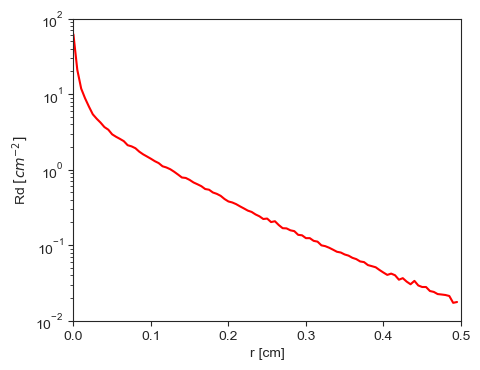

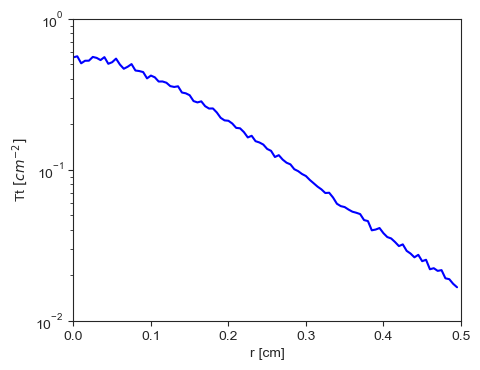

In [8]:
nn = 100
dr = 0.005

alphaRd,Rd = radialDistance(p_result[:,Rd_index],w_result[Rd_index],nn,dr)
alphaTt,Tt = radialDistance(p_result[:,Tt_index],w_result[Tt_index],nn,dr)

plt.figure(figsize=(5,4),dpi=100)
plt.plot(alphaRd,Rd,'-',c = 'red')
plt.yscale('log')
plt.xlim(0,0.5)
plt.ylim(10**-2,10**2)
plt.xlabel('r [cm]')
plt.ylabel('Rd $[cm^{-2}]$')
plt.show()

plt.figure(figsize=(5,4),dpi=100)
plt.plot(alphaTt,Tt,'-',c = 'blue')
plt.yscale('log')
plt.xlim(0,0.5)
plt.ylim(10**-2,1)
plt.xlabel('r [cm]')
plt.ylabel('Tt $[cm^{-2}]$')
plt.show()

In [9]:
df_ = pa.DataFrame(np.array([alphaRd,Rd,Tt]).T,columns = ['r cm','Rd','Tt'])
df_.to_csv('result/multi_rt_test.csv',index=None)